In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200
hyperparams.BATCH_SIZE = 16

hyperparams.NUM_CHANNELS = 32
hyperparams.NUM_RES_BLOCKS = 5

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
MODEL_NAME = "0001_0010-64-resnet-xh"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ResnetBatchE as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4371851889024499120
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1803960320
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16303319907152421823
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT)

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:4900
Nitid files:4900


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 100 )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/200
1229/1229 [==============================] - 230s 176ms/step - loss: 0.1382 - val_loss: 0.0591
Epoch 2/200
1229/1229 [==============================] - 214s 174ms/step - loss: 0.0562 - val_loss: 0.0527
Epoch 3/200
1229/1229 [==============================] - 214s 174ms/step - loss: 0.0509 - val_loss: 0.0494
Epoch 4/200
1229/1229 [==============================] - 213s 174ms/step - loss: 0.0488 - val_loss: 0.0468
Epoch 5/200
1229/1229 [==============================] - 214s 174ms/step - loss: 0.0472 - val_loss: 0.0461
Epoch 6/200
1229/1229 [==============================] - 214s 174ms/step - loss: 0.0459 - val_loss: 0.0463
Epoch 7/200
1229/1229 [==============================] - 214s 174ms/step - loss: 0.0449 - val_loss: 0.0463
Epoch 8/200
1229/1229 [==============================] - 210s 171ms/step - loss: 0.0442 - v

1229/1229 [==============================] - 166s 135ms/step - loss: 0.0320 - val_loss: 0.0325
Epoch 76/200
1229/1229 [==============================] - 166s 135ms/step - loss: 0.0318 - val_loss: 0.0353
Epoch 77/200
1229/1229 [==============================] - 166s 135ms/step - loss: 0.0318 - val_loss: 0.0370
Epoch 78/200
1229/1229 [==============================] - 165s 134ms/step - loss: 0.0317 - val_loss: 0.0342
Epoch 79/200
1229/1229 [==============================] - 165s 135ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 80/200
1229/1229 [==============================] - 166s 135ms/step - loss: 0.0315 - val_loss: 0.0342
Epoch 81/200
1229/1229 [==============================] - 164s 133ms/step - loss: 0.0316 - val_loss: 0.0345
Epoch 82/200
1229/1229 [==============================] - 167s 136ms/step - loss: 0.0314 - val_loss: 0.0388
Epoch 83/200
1229/1229 [==============================] - 168s 137ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 84/200
1229/1229 [=================

1229/1229 [==============================] - 164s 133ms/step - loss: 0.0295 - val_loss: 0.0352
Epoch 151/200
1229/1229 [==============================] - 164s 133ms/step - loss: 0.0296 - val_loss: 0.0358
Epoch 152/200
1229/1229 [==============================] - 164s 134ms/step - loss: 0.0294 - val_loss: 0.0310
Epoch 153/200
1229/1229 [==============================] - 167s 136ms/step - loss: 0.0294 - val_loss: 0.0399
Epoch 154/200
1229/1229 [==============================] - 164s 133ms/step - loss: 0.0294 - val_loss: 0.0318
Epoch 155/200
1229/1229 [==============================] - 164s 133ms/step - loss: 0.0295 - val_loss: 0.0384
Epoch 156/200
1229/1229 [==============================] - 164s 134ms/step - loss: 0.0295 - val_loss: 0.0337
Epoch 157/200
1229/1229 [==============================] - 166s 135ms/step - loss: 0.0293 - val_loss: 0.0318
Epoch 158/200
1229/1229 [==============================] - 168s 137ms/step - loss: 0.0294 - val_loss: 0.0380
Epoch 159/200
1229/1229 [========

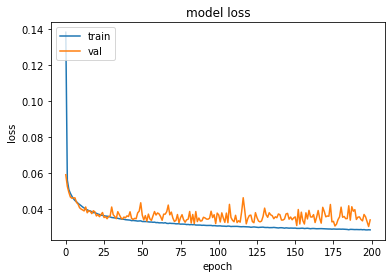

In [8]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-resnet-xh\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =4900
Best RMSENZ  =4143 (0.85)
Best MAENZ   =4126 (0.84)
Best PSNR    =4143 (0.85)
Best Accuracy=3881 (0.79)
RMSE-NZ  Pred=0.0434  Noisy=0.1031
MAE-NZ   Pred=0.0348  Noisy=0.0937
PSNR     Pred=14.5 dB Noisy=8.8 dB
Accuracy Pred=0.19    Noisy=0.12
SSM      Pred=0.66    Noisy=0.31
HOG MSE  Pred=0.08    Noisy=0.08


In [11]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:17
Nitid files:17
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


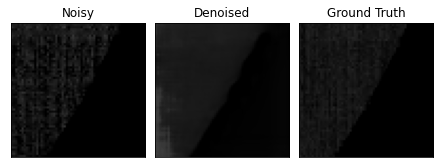

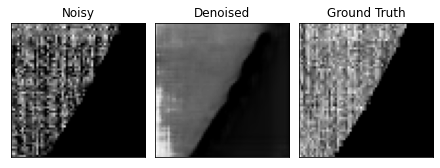

RMSE-NZ  Pred=0.0371  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0248  Noisy=0.0298 BEST
PSNR     Pred=12.3 dB Noisy=11.1 dB BEST
Accuracy Pred=0.29    Noisy=0.36 WORST
SSM      Pred=0.61    Noisy=0.46
HOG MSE  Pred=0.10    Noisy=0.01
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


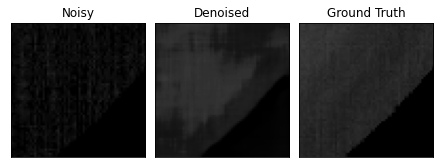

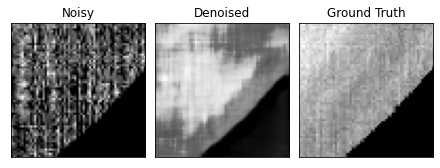

RMSE-NZ  Pred=0.0413  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0342  Noisy=0.1096 BEST
PSNR     Pred=15.2 dB Noisy=6.1 dB BEST
Accuracy Pred=0.17    Noisy=0.07 BEST
SSM      Pred=0.69    Noisy=0.35
HOG MSE  Pred=0.04    Noisy=0.09
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_nitid_idx146.tif


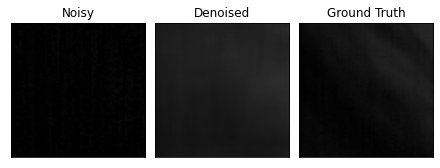

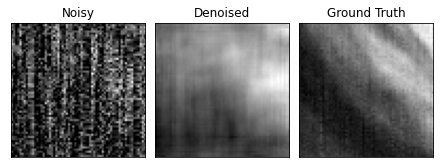

RMSE-NZ  Pred=0.0607  Noisy=0.0587 WORST
MAE-NZ   Pred=0.0576  Noisy=0.0477 WORST
PSNR     Pred=8.3 dB Noisy=8.6 dB WORST
Accuracy Pred=0.01    Noisy=0.13 WORST
SSM      Pred=0.66    Noisy=0.15
HOG MSE  Pred=0.06    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


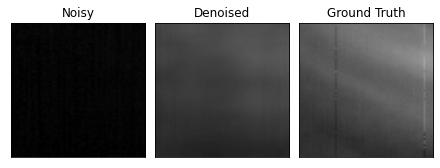

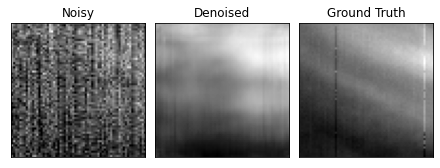

RMSE-NZ  Pred=0.1134  Noisy=0.3357 BEST
MAE-NZ   Pred=0.1010  Noisy=0.3214 BEST
PSNR     Pred=15.0 dB Noisy=5.6 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.80    Noisy=0.14
HOG MSE  Pred=0.09    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


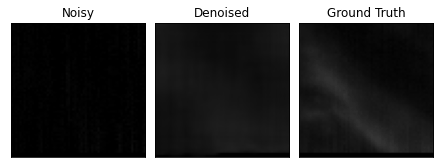

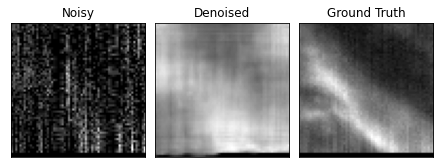

RMSE-NZ  Pred=0.0353  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0286  Noisy=0.0747 BEST
PSNR     Pred=15.5 dB Noisy=7.7 dB BEST
Accuracy Pred=0.20    Noisy=0.01 BEST
SSM      Pred=0.79    Noisy=0.18
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


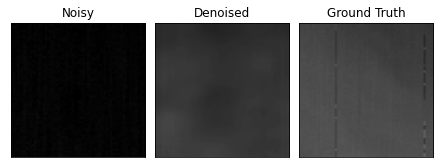

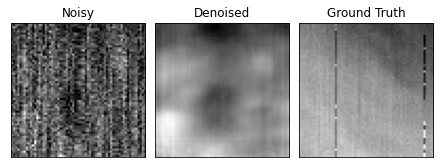

RMSE-NZ  Pred=0.0803  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0768  Noisy=0.2643 BEST
PSNR     Pred=13.5 dB Noisy=3.1 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.14
HOG MSE  Pred=0.06    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


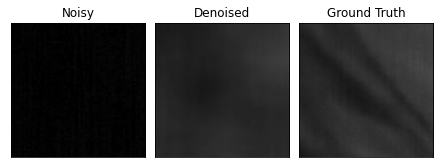

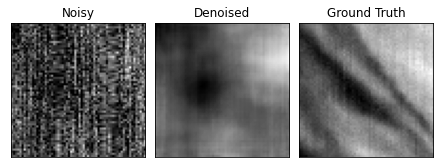

RMSE-NZ  Pred=0.0373  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0316  Noisy=0.1686 BEST
PSNR     Pred=17.7 dB Noisy=4.4 dB BEST
Accuracy Pred=0.17    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.14
HOG MSE  Pred=0.09    Noisy=0.15
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


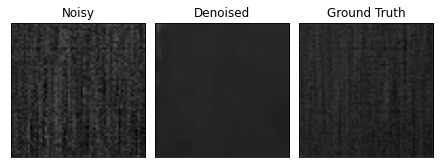

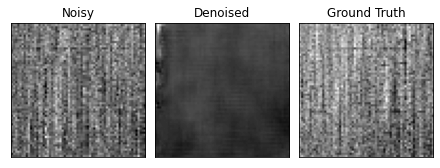

RMSE-NZ  Pred=0.0277  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0220  Noisy=0.0478 BEST
PSNR     Pred=18.8 dB Noisy=12.0 dB BEST
Accuracy Pred=0.28    Noisy=0.15 BEST
SSM      Pred=0.60    Noisy=0.31
HOG MSE  Pred=0.02    Noisy=0.03
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_nitid_idx134.tif


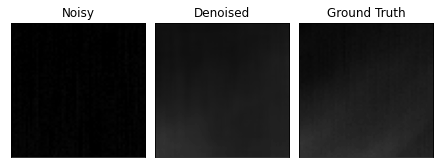

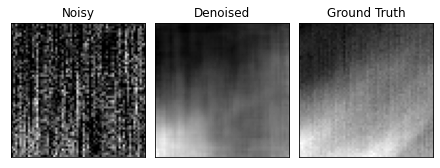

RMSE-NZ  Pred=0.0194  Noisy=0.1061 BEST
MAE-NZ   Pred=0.0148  Noisy=0.0983 BEST
PSNR     Pred=20.5 dB Noisy=5.8 dB BEST
Accuracy Pred=0.43    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.16
HOG MSE  Pred=0.05    Noisy=0.04
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


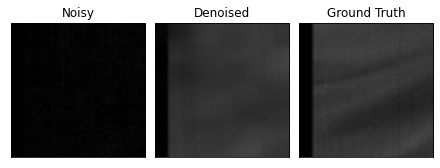

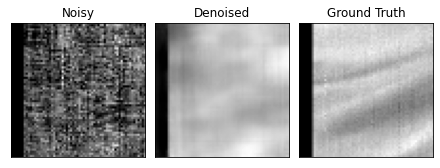

RMSE-NZ  Pred=0.0359  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0270  Noisy=0.1941 BEST
PSNR     Pred=18.0 dB Noisy=3.2 dB BEST
Accuracy Pred=0.25    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.13
HOG MSE  Pred=0.03    Noisy=0.24
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


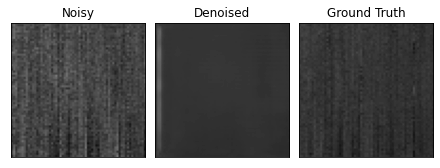

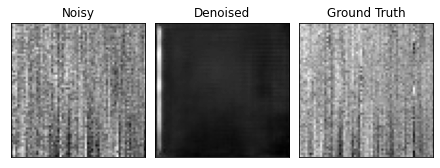

RMSE-NZ  Pred=0.0369  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0246  Noisy=0.0774 BEST
PSNR     Pred=18.1 dB Noisy=10.1 dB BEST
Accuracy Pred=0.31    Noisy=0.06 BEST
SSM      Pred=0.57    Noisy=0.30
HOG MSE  Pred=0.11    Noisy=0.03
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


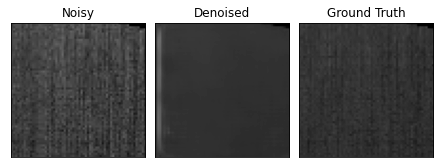

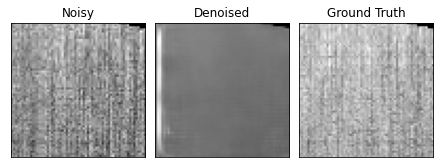

RMSE-NZ  Pred=0.0375  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0228  Noisy=0.0644 BEST
PSNR     Pred=17.5 dB Noisy=11.2 dB BEST
Accuracy Pred=0.34    Noisy=0.08 BEST
SSM      Pred=0.62    Noisy=0.33
HOG MSE  Pred=0.21    Noisy=0.03
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


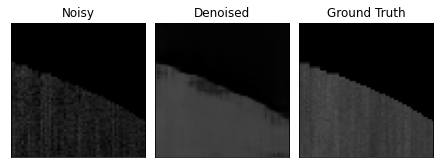

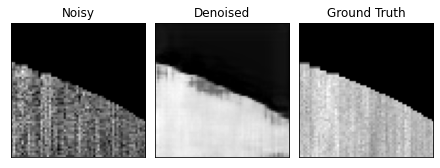

RMSE-NZ  Pred=0.0306  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0213  Noisy=0.1063 BEST
PSNR     Pred=20.3 dB Noisy=8.2 dB BEST
Accuracy Pred=0.25    Noisy=0.19 BEST
SSM      Pred=0.60    Noisy=0.41
HOG MSE  Pred=0.09    Noisy=0.01
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


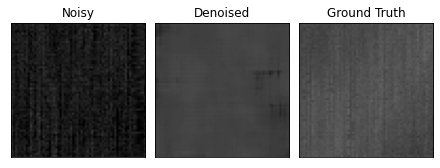

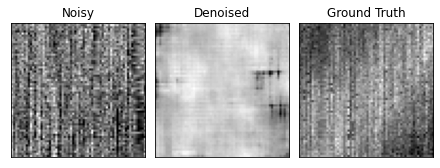

RMSE-NZ  Pred=0.0593  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0526  Noisy=0.2121 BEST
PSNR     Pred=16.5 dB Noisy=5.2 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.68    Noisy=0.27
HOG MSE  Pred=0.05    Noisy=0.05
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


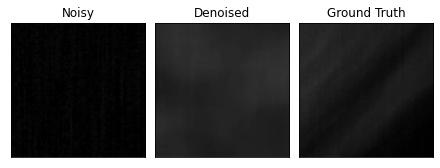

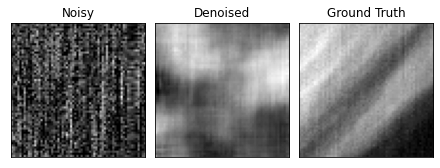

RMSE-NZ  Pred=0.0665  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0591  Noisy=0.0780 BEST
PSNR     Pred=8.5 dB Noisy=6.2 dB BEST
Accuracy Pred=0.04    Noisy=0.06 WORST
SSM      Pred=0.69    Noisy=0.16
HOG MSE  Pred=0.14    Noisy=0.17
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


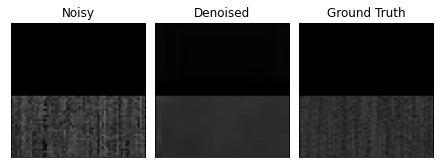

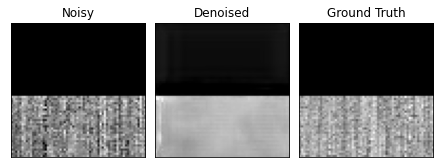

RMSE-NZ  Pred=0.0259  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0203  Noisy=0.0631 BEST
PSNR     Pred=20.9 dB Noisy=11.2 dB BEST
Accuracy Pred=0.19    Noisy=0.09 BEST
SSM      Pred=0.49    Noisy=0.35
HOG MSE  Pred=0.22    Noisy=0.02
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


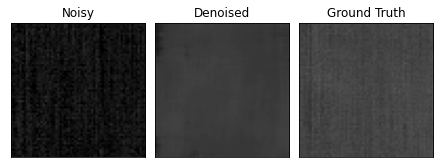

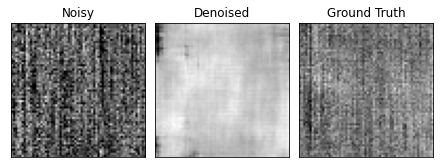

RMSE-NZ  Pred=0.0464  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0406  Noisy=0.2012 BEST
PSNR     Pred=17.6 dB Noisy=4.7 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.73    Noisy=0.24
HOG MSE  Pred=0.04    Noisy=0.05
******************************************************


In [12]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )